In [38]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from fancyimpute import KNN
from sklearn.metrics import mean_squared_error
from math import sqrt
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import sys
import warnings
warnings.filterwarnings("ignore")

In [47]:
df = pd.read_excel(r"C:\Users\bhati\OneDrive\Desktop\Dataset_Fyp.xlsx", sheet_name='Version3',engine='openpyxl',index_col='Date',parse_dates=True)
df.head()

,Money Market - Net liquidity injected,Money Market - Call Money,Money Market - Triparty Money,Money Market - Market Repo,Foreign Exchange Turnover (Purchases) - Merchant FCY/INR - Spot,Foreign Exchange Turnover (Purchases) -Merchnat FCY/INR - Forward,Foreign Exchange Turnover (Purchases) -Merchant FCY/INR - Forward Cancel,Foreign Exchange Turnover (Purchases) -Merchant FCY/FCY - Spot,Foreign Exchange Turnover (Purchases) -Merchant FCY/FCY - Forward,Foreign Exchange Turnover (Purchases) -Merchant FCY/FCY - Forward Cancel,...,NSDL FPI - D-PMO,NSDL FPI - D-ST,NSDL FPI - DVRR_SE,NSDL FPI - DVRR-PMO,NSDL FPI - DVRR-ST,NSDL FPI - H_SE,NSDL FPI - H-PMO,NSDL FPI - H-ST,NSDL FPI - Total,Value of Rupee
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-14,-0.179645,-0.140530,1.888865,2.549562,2297.000000,861.000000,488.000000,47.000000,89,36.000000,...,-0.210000,453.720000,-0.21,41.77,41.56,0.650000,0.0,0.65,588.68,71.45
2020-02-15,-0.181037,-0.066684,2.466285,2.546968,1336.838723,586.685775,292.363524,-42.635685,44,-5.862873,...,8.755250,524.714736,0.00,0.00,0.00,1.223889,0.0,0.55,25.64,71.45
2020-02-16,-0.152035,0.078441,2.463705,2.544374,671.660449,340.320116,113.026919,-65.615348,44,2.857913,...,6.797701,391.039830,0.00,0.00,0.00,1.008416,0.0,0.55,25.64,71.45
2020-02-17,-0.044363,-0.055662,2.461125,2.541780,1714.000000,509.000000,356.000000,60.000000,44,35.000000,...,2.240000,185.070000,0.00,0.00,0.00,0.550000,0.0,0.55,25.64,71.38
2020-02-18,0.068265,-0.017421,2.498545,2.499186,3017.000000,739.000000,735.000000,210.000000,61,39.000000,...,-0.610000,-16.580000,0.00,5.60,5.60,0.330000,0.0,0.33,13.61,71.55


In [48]:
corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
df = df.drop(to_drop, axis=1)
print(len(to_drop))

18


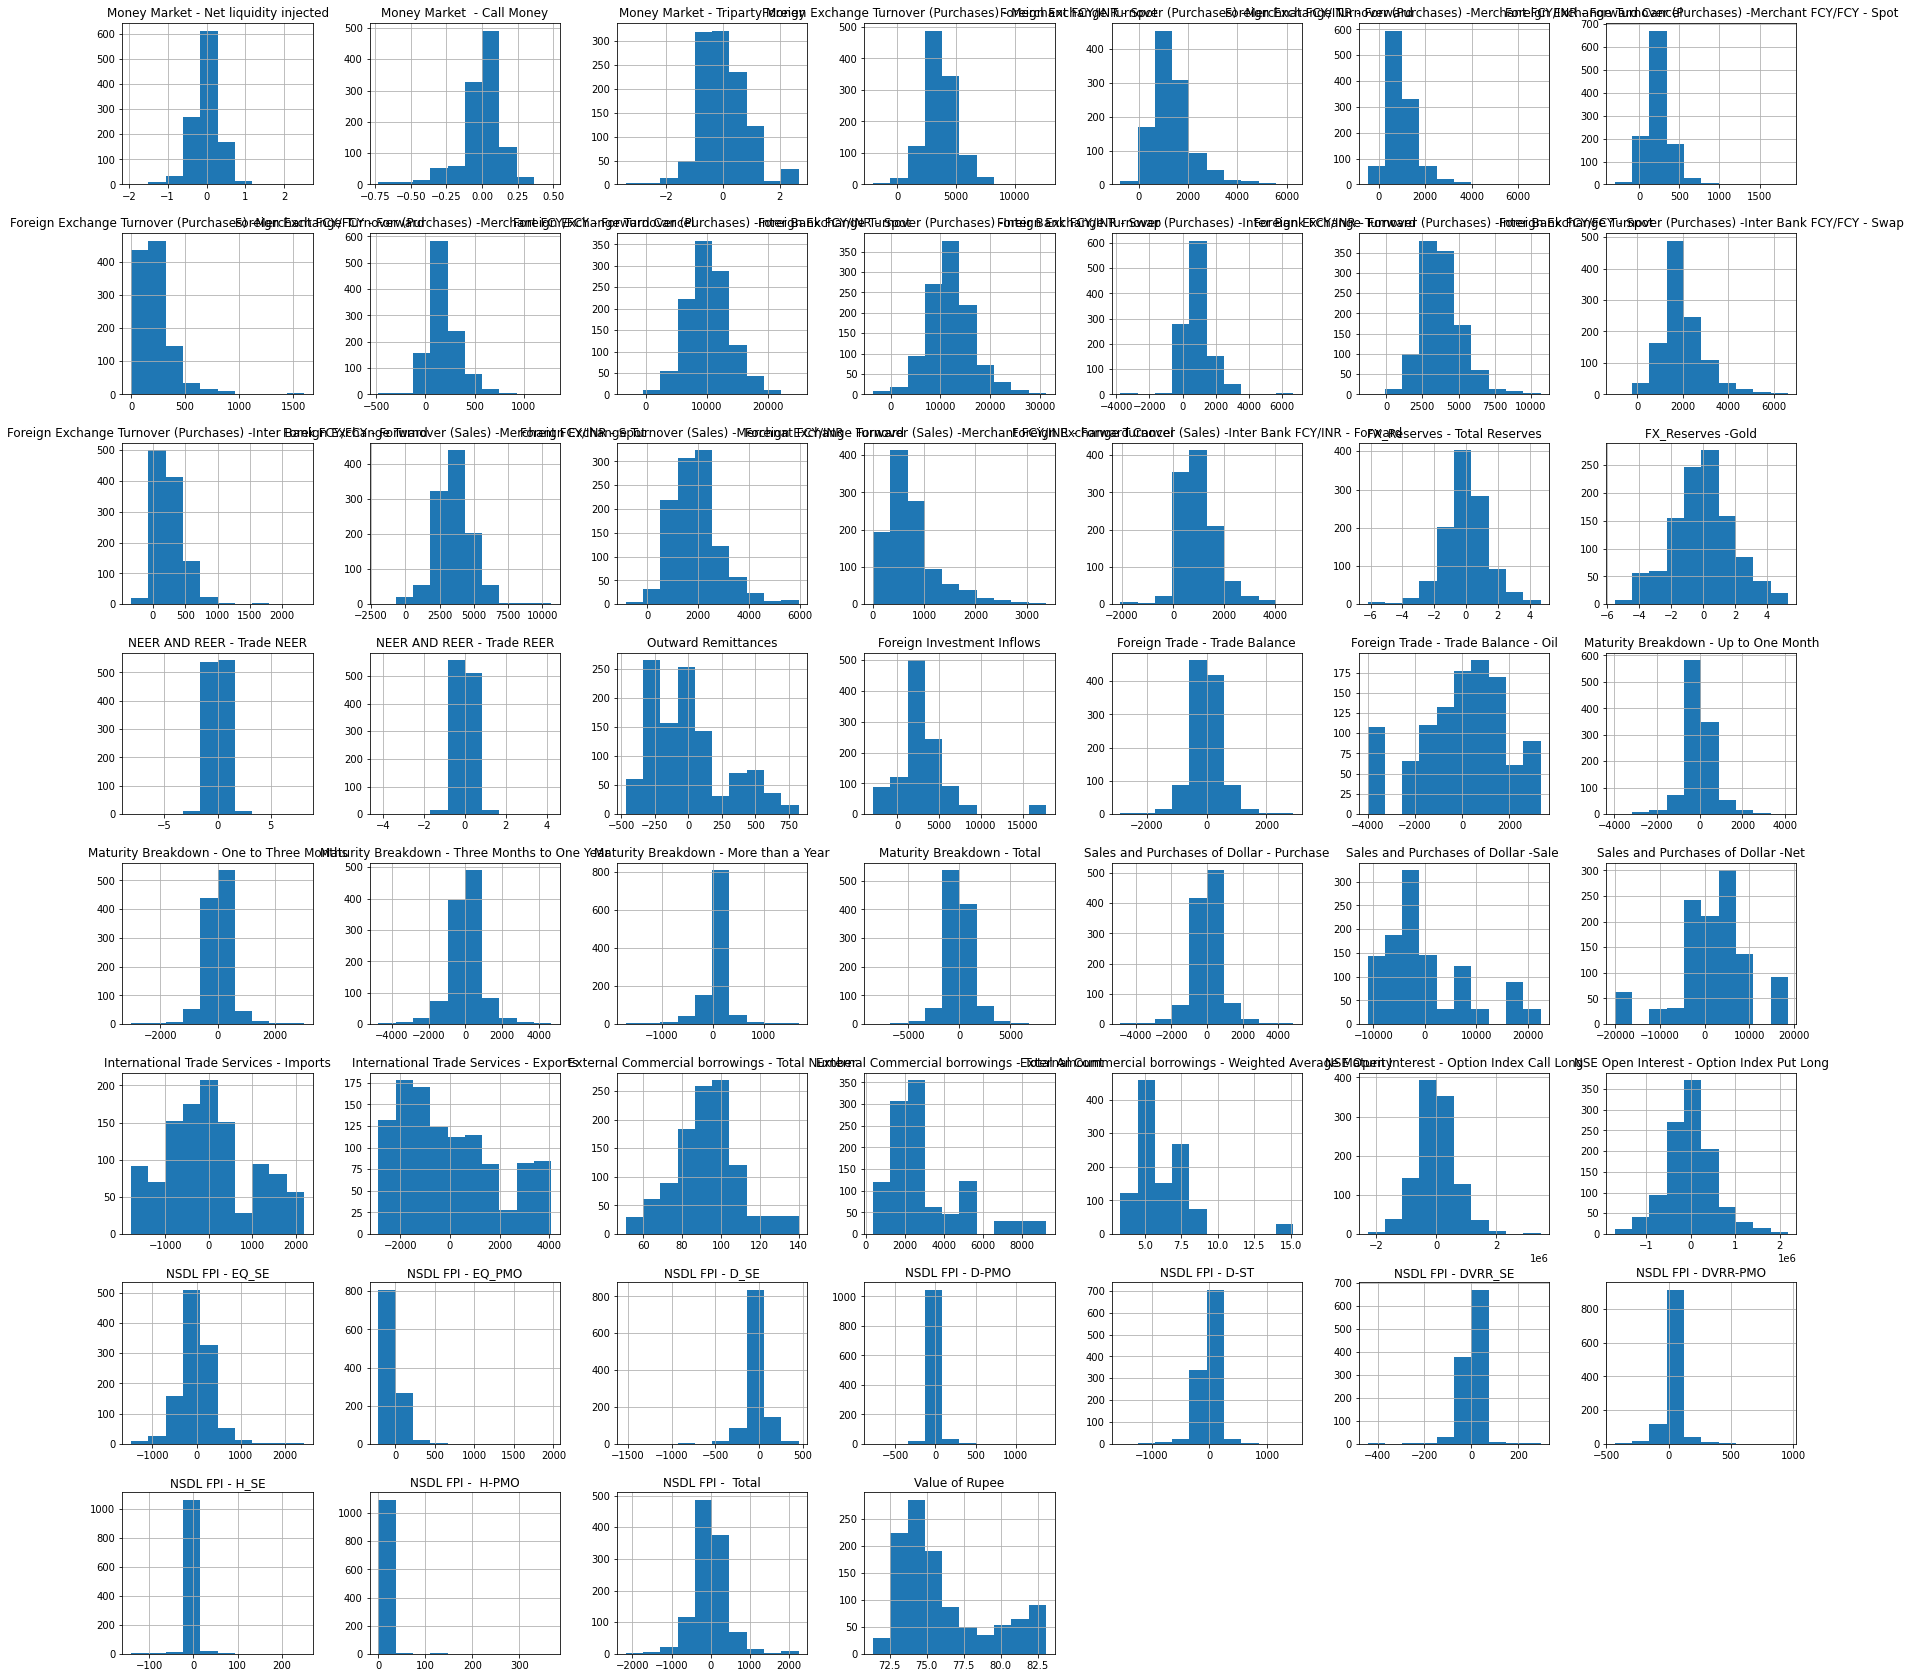

In [41]:
df.hist(figsize=(30,30));

In [49]:
import pandas as pd
from openpyxl import load_workbook
book = load_workbook(r"C:\Users\bhati\OneDrive\Desktop\Dataset_Fyp.xlsx")
writer = pd.ExcelWriter(r"C:\Users\bhati\OneDrive\Desktop\Dataset_Fyp.xlsx", engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
sheet_name = 'Version4'
df.index = df.index.strftime('%d-%m-%Y')
df.to_excel(writer, sheet_name=sheet_name, index=True)
writer.save()
book.save(r"C:\Users\bhati\OneDrive\Desktop\Dataset_Fyp.xlsx")